## 리뷰에서 많이 등장하는 명사 추출

In [1]:
import nltk                             # 텍스트 분석을 위해 nltk 모듈을 불러온다
from collections import Counter         # collections 패키지로부터 Counter를 불러온다

In [2]:
# 명사를 담기 위한 리스트를 생성한다

nounList = []

In [4]:
# open 함수를 통해 're-thedarkknight.txt' 파일을 열고 이를 f로 지정한다

with open('re-thedarkknight.txt', 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    f.close()
    
for line in lines:                                       # for문을 통해 각 줄에 접근한다:
    tokens = nltk.word_tokenize(line)                    # 각 줄을 tokenize한다
    tags = nltk.pos_tag(tokens)                          # tokenize한 결과를 품사 태깅한다
    for word, tag in tags:                               # for 문을 통해 각각의 (단어, 태그) 쌍에 접근
        if tag in ['NN', 'NNS', 'NNP', 'NNPS']:          # 만약 태그가 명사이면:
            nounList.append(word.lower())                # 소문자로 변환한 후 리스트에 첨부한다

In [5]:
counts = Counter(nounList)                               # 각 명사의 숫자를 센 결과를 변수에 저장한다
print(counts.most_common(10))                            # 가장 흔히 등장하는 10개 명사를 출력한다

[('movie', 405), ('batman', 328), ('film', 288), ('joker', 222), ('dark', 139), ('ledger', 133), ('knight', 128), ('time', 108), ('heath', 108), ('action', 89)]


## 리뷰에서 많이 등장하는 형용사 추출 

In [6]:
import nltk
from collections import Counter

In [7]:
adjList = []

In [9]:
with open('re-thedarkknight.txt', 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    f.close()
    
for line in lines:
    tokens = nltk.word_tokenize(line)
    tags = nltk.pos_tag(tokens)
    for word, tag in tags:
        if tag in ['JJ', 'JJR', 'JS']:
            adjList.append(word.lower())

In [10]:
counts = Counter(adjList)
print(counts.most_common(10))

[('good', 139), ('great', 77), ('much', 57), ('many', 52), ('comic', 45), ('real', 37), ('bad', 30), ('little', 29), ('new', 27), ('christian', 26)]


## 전체 리뷰의 토큰 개수 탐색

In [11]:
import nltk                               # 텍스트 분석을 위해 nltk 모듈을 불러온다
from nltk.corpus import stopwords         # nltk 모듈에서 Stopwords를 직접 불러온다

In [12]:
# 영어의 stopwords를 불러와 변수에 저장한다

stopWords = set(stopwords.words('english'))

In [13]:
with open('result-1-3-4.txt', 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    f.close()

In [14]:
tokens = []                                         # token을 담기 위한 리스트를 생성한다
for line in lines:                                  # for문을 통해 각각의 줄에 접근한다:
    line = nltk.word_tokenize(line.lower())         # 각 라인을 소문자로 변환한 후 tokenize한다
    for word in line:                               # 라인의 각 token에 for문을 통해 접근한다:
        if word not in stopWords:                   # 만약 token이 stopword가 아니면:
            tokens.append(word)                     # 리스트에 첨부한다

In [15]:
corpus = nltk.Text(tokens)                          # Text() 객체를 corpus 변수에 저장한다

print(len(corpus.tokens))                           # 전체 token의 개수를 출력한다
print(len(set(corpus.tokens)))                      # unique한 token의 개수를 출력한다

21186
4660


## 토큰의 등장 횟수 시각화

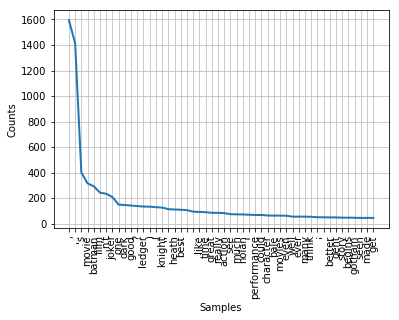

In [16]:
# 가장 많이 등장하는 50개 단어의 빈도수를 그래프로 표현해 출력한다
corpus.plot(50)

## 문맥상 유사한 단어 출력

In [18]:
# 'Batman'과 'Joker'와 유사한 단어를 출력한다

print('='*50)
print('Similar words with Batman: ')
corpus.similar('Batman')                      #'Batman'과 유사한 단어를 출력한다
print('='*50)
print('Similar words with Joker: ')
corpus.similar('Joker')                       # 'Joker'와 유사한 단어를 출력한다
print('='*50)

Similar words with Batman: 
superhero film action good better seen one movie actors character
heath performance modern difficult villain second end films best
iconic
Similar words with Joker: 
time jack fan would watch dramas


## 텍스트의 연어(collocation) 출력 

In [19]:
print('Collocations for reviews of "The Dark Knight": ')
corpus.collocations()                                    # 다크 나이트 영화 리뷰의 연어를 출력한다

Collocations for reviews of "The Dark Knight": 
dark knight; heath ledger; christian bale; comic book; harvey dent;
christopher nolan; bruce wayne; aaron eckhart; morgan freeman; gary
oldman; batman begins; gotham city; maggie gyllenhaal; two face;
michael caine; special effects; rachel dawes; district attorney; jack
nicholson; 've seen
